### TRABAJO PRACTICO FINAL
Alumnos:
- Maria Victoria Teran Beiza
- Fernando Vasconcelos
- Gustavo Uñapillco
- Lara Rosenberg

#### INTRODUCCION
Para el presente trabajo se utilizó un dataset de encuestas de satisfacción de una aerolinea comercial, obtenido de Kaggle: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

El mismo contiene la siguiente información:
- id: Identificador del cliente.
- Gender: Género del pasajero (Female= femenino, Male=masculino).
- Customer Type: Tipo de cliente (Loyal customer, disloyal customer).
- Age: Edad del pasajero.
- Type of Travel: Propósito del vuelo para el pasajero (Personal Travel, Business Travel).
- Class: Clase en el vuelo a la que pertenece el pasajero (Business, Eco, Eco Plus).
- Flight distance: Distancia del vuelo.
- Inflight wifi service: Nivel de satisfacción con el servicio de wifi a bordo (0:Not Applicable;1-5).
- Departure/Arrival time convenient: Nivel de satisfacción de la hora de salida/llegada.
- Ease of Online booking: Nivel de satisfacción de la reserva online.
- Gate location: Nivel de satisfacción con la ubicación de la puerta
- Food and drink: Nivel de satisfacción con la comida y la bebida.
- Online boarding: Nivel de satisfacción del embarque online.
- Seat comfort: Nivel de satisfacción con la comodidad del asiento.
- Inflight entertainment: Nivel de satisfacción con el servicio de entretenimiento a bordo.
- On-board service: Nivel de satisfacción a bordo.
- Leg room service: Nivel de satisfacción con el espacio para las piernas.
- Baggage handling: Nivel de satisfacción del manejo de equipaje.
- Check-in service: Nivel de satisfacción con el servicio de check-in.
- Inflight service: Nivel de satisfacción con el servicio en el vuelo.
- Cleanliness: Nivel de satisfacción con la limpieza.
- Departure Delay in Minutes: Minutos de atraso en la salida.
- Arrival Delay in Minutes: Minutos de atraso en la arribo.
- Satisfaction: Nivel de satisfacción con la aerolinea (Satisfaction, neutral or dissatisfaction).

Lo más importante a la hora de realizar el análisis exploratorio, la limpieza y la preparación de los datos es el objetivo que se busca alcanzar con el análisis. En este caso, el objetivo es predecir si el usuario estará o no satisfecho con la aerolinea en determinado vuelo. También es entender qué variables son las que mas afectan la conformidad o disconformidad del usuario, a efectos de que la aerolinea pueda accionar sobre las mismas.

In [214]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#configuraciones generales
pd.set_option('display.max_columns', None)

randon_generator = np.random.default_rng(45)

# Colores
satisfied_color = 'limegreen'
unsatisfied_color = 'gainsboro'

male_color = 'lightsteelblue'
female_color = 'salmon'

loyal_color = 'gold'
disloyal_color = 'grey'

business_travel_color = 'royalblue'
personal_travel_color = 'orange'

business_class_color = 'royalblue'
eco_plus_class_color = 'greenyellow'
eco_class_color = 'lightgreen'

# Configuraciones de graficos
shadow_dict = {'ox': 1.4, 'edgecolor': 'none', 'shade': 0.1}
merge_df = True

El dataset en trato viene separado en un datase de entrenamiento y otro de test. Vamos a juntar los mismos para realizar el análisis de datos y separarlos al momomento de realizar el entrenamiento del modelo.

In [45]:
# Importamos el dataset de train
df_train = pd.read_csv('data/train.csv')
print(df_train.shape)
#Importamos el dataset de test
df_test = pd.read_csv('data/test.csv')
print(df_test.shape)
df_test.head()

(103904, 25)
(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [34]:
# Unimos ambos datasets para separarlos por nuestro lado
if merge_df:
    df_air = pd.concat([df_train, df_test]).sample(frac=1, random_state=randon_generator)
else:
    df_air = df_train

print("El dataset en análisis cuenta con {record} registros y {columns} columnas.".format(record=df_air.shape[0],
                                                                                          columns=df_air.shape[1]))

El dataset en análisis cuenta con 129880 registros y 25 columnas.


Analizamos si existen columnas con información irrelevante para el análisis de datos  

In [16]:
df_air.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
76762,76762,96515,Male,Loyal Customer,68,Personal Travel,Eco,436,2,5,2,5,5,2,5,5,4,5,5,5,5,5,110,92.0,neutral or dissatisfied
8895,8895,58277,Female,Loyal Customer,38,Business travel,Business,2946,4,4,4,4,3,5,4,5,5,5,5,4,5,5,0,0.0,satisfied
43698,43698,21000,Female,disloyal Customer,7,Business travel,Eco,721,2,2,2,4,4,2,4,4,1,1,4,3,4,4,3,7.0,neutral or dissatisfied
9600,9600,72948,Male,Loyal Customer,29,Business travel,Business,3300,2,2,2,2,4,4,4,4,4,4,4,3,4,4,0,0.0,satisfied
18514,18514,15925,Male,Loyal Customer,31,Business travel,Business,1846,1,5,5,5,1,1,1,1,4,3,4,4,4,1,0,8.0,neutral or dissatisfied


In [30]:
print("{record_number} registros unicos para la columna id".format(record_number=len(df_air.id.unique())))

129880 registros unicos para la columna id


De la visualización del de las primeras cinco (5) filas del dataset, observamos que la columna **id** es una variable cualitativa ordinal que identifica a la persona que realizó la encuesta. Cada usuario aparece una única vez (no hay id repetidos).
<br>
<br>
La columna **Unnamed:0** representa el número de fila de cada registro del dataset tanto para el set de entrenamiento como en el set de datos. Esto se observa al listar las primeras cinco filas de los mencionados set.
<br>
<br>
De lo expuesto, concluimos que las columnas mencionadas no resultan informativas para un problema de clasificación. Por lo tanto, procedemos a descartarlas.



In [35]:
# Borramos la columna Unnamed e id
df_air.drop(columns=['Unnamed: 0', 'id'], inplace=True)
df_air.shape

(129880, 23)

In [38]:
df_air.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [112]:
df_air.describe(include=['object'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


Se puede notar que:
- El mínimo de edad de un pasajero que completó la encuesta es de 7.
- La distancia media de los vuelos ronda en las 1188 millas.
- En general, el tiempo de demora tanto en el arribo como en la salida es en el 75% de los casos, menor a los 15 minutos, y se observa que el maximo es de 1600 minutos aproximadamente, lo que implica que en esta variable encontraremos outliers.
- La mayoría de features numéricas son niveles de satisfacción que van del 0 al 5. Donde el rango 1 a 5 corresponde a niveles de satisfacción que van de "poco satisfecho" a muy "satisfecho" y el 0 corresponde a que la pregunta no fue respondida o no corresponde.
- La mayoría de las personas que respondieron a esta encuesta son clientes leales, el tip de vuelo es por Trabajo y la clase mayoritaria es Business. Aca podriamos considerar que la encuesta está respondida por usuarios con cierto sesgo: en general, uno esperaría que la clase mayoritaria sea la económica (ya que hay más asientos en el avión pertenecientes a esta clase).

In [21]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 75927 to 12396
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880

### A continuación listamos los tipos de variables de cada columna. A su vez realizar una división de los atributos de la siguiente manera:
#### VARIABLES DE ENTRADAS
* Atributos del pasajero
<br>
 
    | Variable | Tipo de dato | Escala de medida |
    | --- | --- | --- |
    | Gender | Cualitativa | Nominal |
    | Customer Type | Cualitativa | Nominal |
    | Age | Cuantitativa Discreta | De razon |
  <br>  
* Atributos de Viaje
<br>

    | Variable | Tipo de dato | Escala de medida |
    | --- | --- | --- |
    | Type of Travel | Cualitativa | Nominal |
    | Class | Cualitativa | Ordinal |
    | Flight Distance | Cuantitativa Discreta  | De razon |
  <br>

* Atributos de Servicios Relacionados con la Experiencia del Vuelo
<br>

    | Variable | Tipo de dato | Escala de medida |
    | --- | --- | --- |
    | Inflight wifi service  | Cualitativa | Ordinal |
    | Departure/Arrival time convenient | Cualitativa | Ordinal |
    | Ease of Online booking  | Cualitativa | Ordinal |
    | Gate location | Cualitativa | Ordinal |
    | Food and drink | Cualitativa | Ordinal |
    | Online boarding | Cualitativa | Ordinal |
    | Seat comfort | Cualitativa | Ordinal |
    | Inflight entertainment | Cualitativa | Ordinal |
    | On-board service | Cualitativa | Ordinal |
    | Leg room service | Cualitativa | Ordinal |
    | Baggage handling | Cualitativa | Ordinal |
    | Checkin service | Cualitativa | Ordinal |
    | Inflight service | Cualitativa | Ordinal |
    | Cleanliness | Cualitativa | Ordinal |
<br>

* Atributos de Rendimiento de vuelo
<br>

    | Variable |  Tipo de dato         | Escala de medida |
    |---------------------------|-----------------------| --- |
    | Departure Delay in Minutes | Cuantitativa Discreta | De razon |
    | Arrival Delay in Minutes  | Cuantitativa Discreta | De razon |
<br>

#### VARIABLE DE SALIDA
* Target
<br>

    | Variable |  Tipo de dato         | Escala de medida |
    | --- |-------------|---------|
    | satisfaction | Cualitativa | Nominal |
  

In [230]:
# Defininos algunos diccionarios
satisfaction_columns = ['Inflight wifi service',
                        'Departure/Arrival time convenient',
                        'Ease of Online booking',
                        'Gate location',
                        'Food and drink',
                        'Online boarding',
                        'Seat comfort',
                        'Inflight entertainment',
                        'On-board service',
                        'Leg room service',
                        'Baggage handling',
                        'Checkin service',
                        'Inflight service',
                        'Cleanliness']
num_dis= ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cualitativas_ord = ['Class','Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
                    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment',
                    'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']
cualitativas_nom = ['Gender', 'Customer Type','Type of Travel']
target = ['target']

### ANÁLISIS EXPLORATORIO

#### TARGET
Nuestro objetivo va a ser predecir si el usuario va a estar o no satisfecho con la aerolinea. Para eso, revisamos la distribución del target.

TypeError: 'str' object is not callable

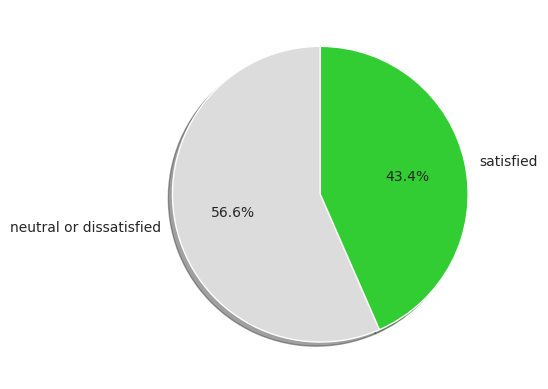

In [178]:
fig, ax = plt.subplots()
ax.pie(df_air.satisfaction.value_counts(), labels=df_air.satisfaction.unique(), shadow=shadow_dict,
       colors=[unsatisfied_color, satisfied_color], autopct='%1.1f%%', startangle=90)
plt.title("Satisfacción del pasajero")
plt.show()

Como podemos notar, las clases están relativamente balanceadas, aunque predominan los usuarios insatisfechos o neutrales.

#### FEATURES

##### PASAJERO

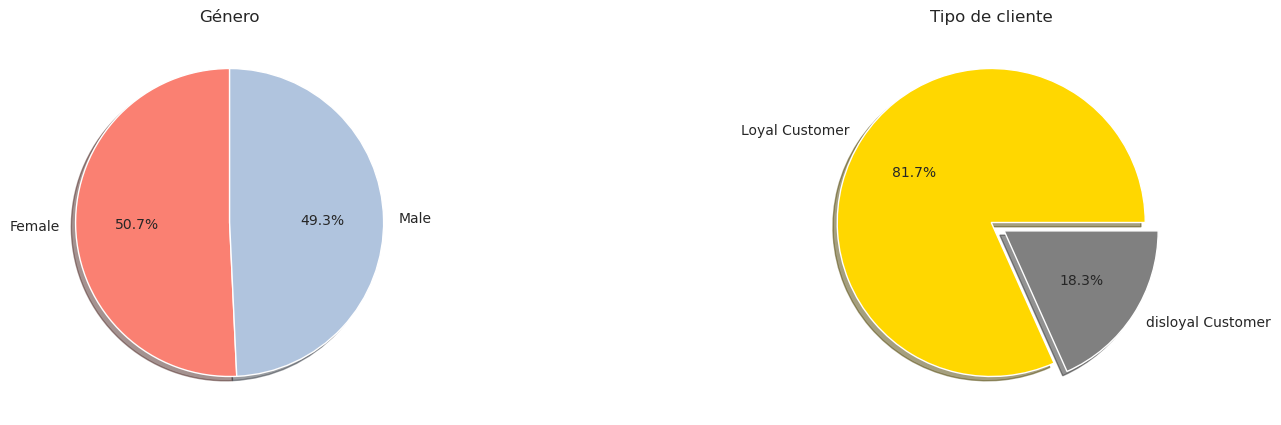

In [182]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
gender_series = df_air.Gender.value_counts()
ax1.pie(gender_series, labels=gender_series.index, shadow=shadow_dict, colors=[female_color, male_color],
        autopct='%1.1f%%', startangle=90)
ax1.set_title("Género")
# sns.pie(data=df_air.Gender, ax=ax1)

customer_type_series = df_air['Customer Type'].value_counts()
ax2.pie(customer_type_series, labels=customer_type_series.index, colors=[loyal_color, disloyal_color], explode=(0, 0.1),
        shadow=shadow_dict, autopct='%1.1f%%')
ax2.set_title("Tipo de cliente")
# plt.tight_layout()
plt.subplots_adjust(wspace=0.9)
plt.show()



#### Conclusiones
- Como podemos observar la distribución de hombres y mujeres está bien balanceada.


- Respecto al Tipo de Cliente observamos que los que respondieron las encuestas son mayoritariamente "Loyal Customer". Esto se puede explicar debido a que los clientes leales tienden a estar más interesados en proporcionar retroalimentación respecto a la calidad de servicio que reciben y desean verlo mejorar. A su vez, estos pueden estar incentivados por la aerolínea con recompensas de distinto tipo, como millas adicionales. 

A los efectos de ilustrar las edades, separamos las mismas en etapas de vida como continuación detallamos:
* Infancia: de 0 a 13 años
* Adolescencia: de 13 a 18 años
* Jóvenes adultos: de 18 a 25 años
* Adultos jóvenes: de 25 a 35 años
* Adultos medios: de 35 a 45 años
* Adultos mayores: de 45 a 55 años
* Prejubilación: 55 a 65 años
* Jubilación y tercera edad: 65 años en adelante

In [148]:
def clasificar_etapa_vida(edad):
    if edad < 13:
        return 'Infancia'
    elif edad < 18:
        return 'Adolescencia'
    elif edad < 25:
        return 'Jóvenes adultos'
    elif edad < 35:
        return 'Adultos jóvenes'
    elif edad < 45:
        return 'Adultos medios'
    elif edad < 55:
        return 'Adultos mayores'
    elif edad < 65:
        return 'Prejubilación'
    else:
        return 'Jubilación y tercera edad'


df_air['Age Stage'] = df_air['Age'].apply(clasificar_etapa_vida)
etapas_orden = ['Infancia', 'Adolescencia', 'Jóvenes adultos', 'Adultos jóvenes',
                'Adultos medios', 'Adultos mayores', 'Prejubilación',
                'Jubilación y tercera edad']
df_air['Age Stage'] = pd.Categorical(df_air['Age Stage'], categories=etapas_orden, ordered=True)

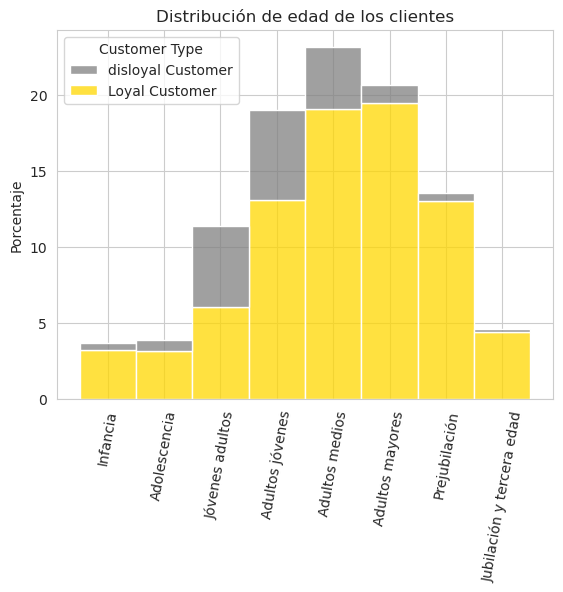

In [183]:
fig, ax = plt.subplots()
colores = {'Loyal Customer': loyal_color, 'disloyal Customer': disloyal_color}
sns.histplot(data=df_air, x='Age Stage', stat='percent', hue='Customer Type', palette=colores, multiple='stack', ax=ax)
plt.xticks(rotation=80)
ax.set_title("Distribución de edad de los clientes")
plt.xlabel("")
plt.ylabel("Porcentaje")
plt.show()


In [185]:
df_air['Age Stage'].value_counts(normalize=True)

Age Stage
Adultos medios               0.231568
Adultos mayores              0.206645
Adultos jóvenes              0.190060
Prejubilación                0.135779
Jóvenes adultos              0.114067
Jubilación y tercera edad    0.046066
Adolescencia                 0.038905
Infancia                     0.036911
Name: proportion, dtype: float64

#### Conclusiones
* Observamos que los clientes con edades dentro de Adultos Jovenes y Adultos Mayor son la proporción mayoritaria que realizó la encuesta. Al rededor del 63 %.
* Entre los clientes con edades dentro de Jóvenes Adultos y Adultos Jóvenes se encuentran balanceados respecto a la categoría Customer Type.
* Notamos que al rededor de 7 % de los encuestados se encuentran dentro de rango de edades Infancia (3.7%) y Adolescencia (3.9%). Creemos que en para el caso de los que se encuentran en el rango infancia los datos no serían válidos, por lo que podríamos eliminarlos. No obstante ello, al no poder contar con más información respecto a como se realizó la encuesta decidimos mantenerlos.

#### VIAJE

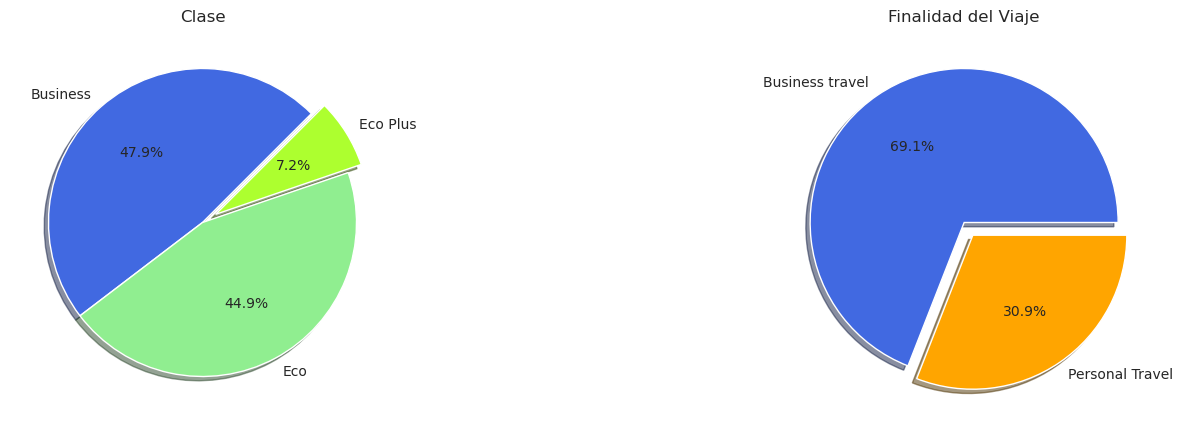

In [215]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
class_series = df_air['Class'].value_counts()
ax1.pie(class_series, labels=class_series.index, explode=(0, 0, 0.1), shadow=shadow_dict,
        colors=[business_class_color, eco_class_color, eco_plus_class_color], autopct='%1.1f%%', startangle=45)
ax1.set_title("Clase")
# sns.pie(data=df_air.Gender, ax=ax1)

travel_type_series = df_air['Type of Travel'].value_counts()
ax2.pie(travel_type_series, labels=travel_type_series.index, colors=[business_travel_color, personal_travel_color],
        explode=(0, 0.1), shadow=shadow_dict, autopct='%1.1f%%')
ax2.set_title("Finalidad del Viaje")
# plt.tight_layout()
plt.subplots_adjust(wspace=0.9)
plt.show()

#### Conclusiones
- La mayoría de los usuarios viajan por trabajo y no por motivos personales.
- Muy pocos usuarios tienen como clase Eco Plus.

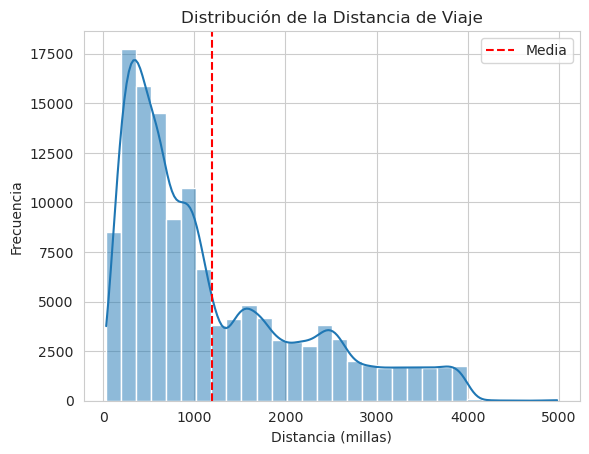

In [227]:
fig, ax = plt.subplots()
# Histograma con personalización
sns.histplot(df_air['Flight Distance'], bins=30, kde=True, ax=ax)

# Añadir una línea de media
plt.axvline(df_air['Flight Distance'].mean(), color='red', linestyle='--', label='Media')

# Configurar el título y las etiquetas
ax.set_title('Distribución de la Distancia de Viaje')
plt.xlabel('Distancia (millas)')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

#### Conclusiones
- Respecto de la distancia, la aerolinea parece hacer más vuelos cortos que largos.
### VER OTRAS CONCLUSIONES

#### Servicios Relacionados con la Experiencia del Vuelo

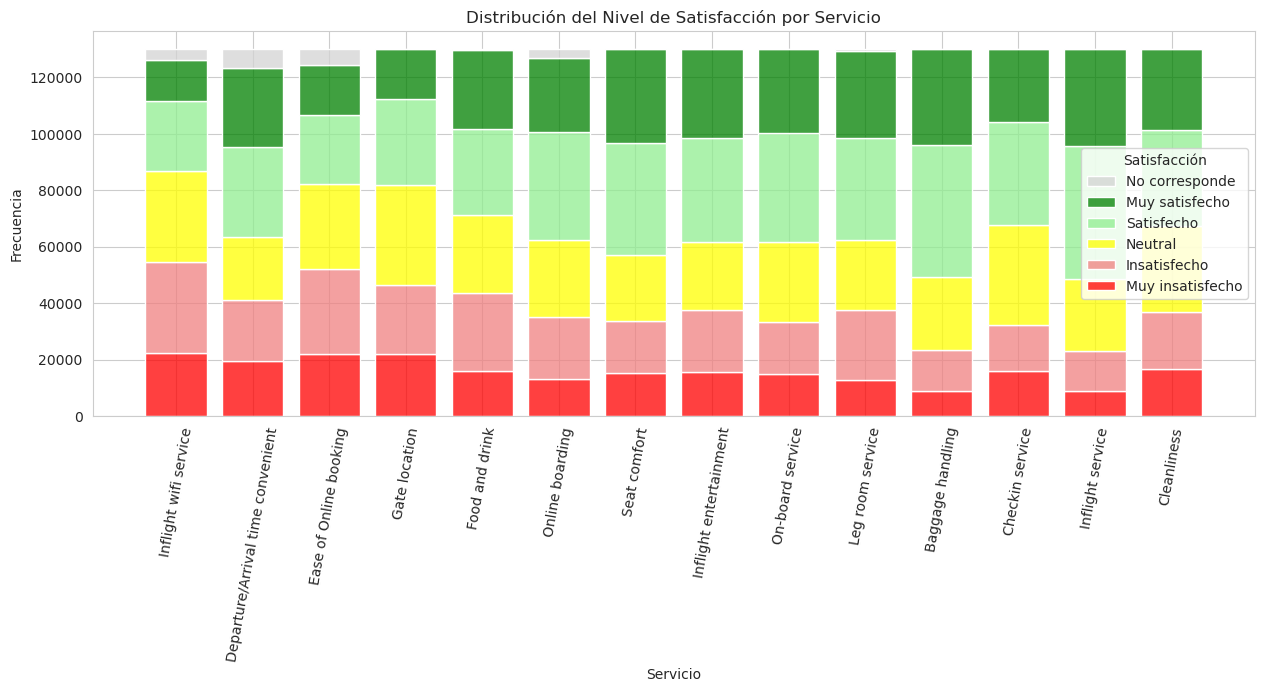

In [259]:
# Supongamos que df es tu DataFrame y las columnas de satisfacción son 'servicio_1', 'servicio_2', etc.
fig, ax = plt.subplots(figsize=(15, 5))

mapeo_satisfaccion = {
    0: "No corresponde",
    1: "Muy insatisfecho",
    2: "Insatisfecho",
    3: "Neutral",
    4: "Satisfecho",
    5: "Muy satisfecho"
}

# Contar las frecuencias de cada nivel de satisfacción para cada servicio
df_melted = df_air.melt(value_vars=satisfaction_columns, var_name='Servicio', value_name='Satisfacción')

paleta_colores = sns.color_palette(['lightgrey', 'green', 'lightgreen', 'yellow', 'lightcoral', 'red'])
df_melted['Satisfacción'] = df_melted['Satisfacción'].map(mapeo_satisfaccion)
df_melted['Satisfacción'] = pd.Categorical(df_melted['Satisfacción'], categories=['No corresponde', 'Muy satisfecho', 'Satisfecho', 'Neutral', 'Insatisfecho', 'Muy insatisfecho' ])  # Convertir a string para usar hue

# Gráfico de barras apiladas
sns.histplot(df_melted, x='Servicio', hue='Satisfacción', multiple='stack', palette=paleta_colores, shrink=0.8, ax=ax)
plt.xticks(rotation=80)
# Configuración de título y etiquetas
ax.set_title('Distribución del Nivel de Satisfacción por Servicio')
plt.xlabel('Servicio')

plt.ylabel('Frecuencia')
# plt.set_title(title='Nivel de Satisfacción')

plt.show()
# df_melted

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 85])

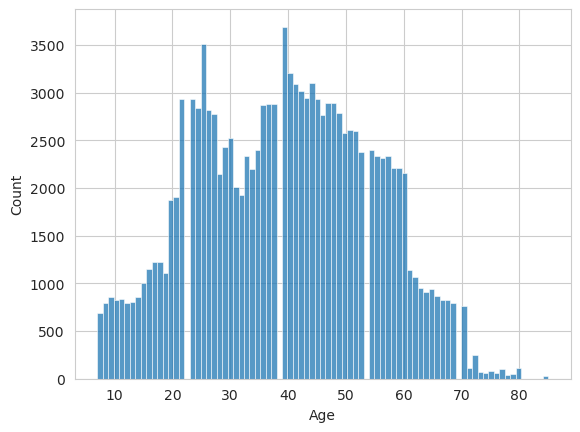

In [104]:
sns.histplot(data=df_air.Age)
np.sort(df_air.Age.unique())

<Axes: xlabel='Age', ylabel='Count'>

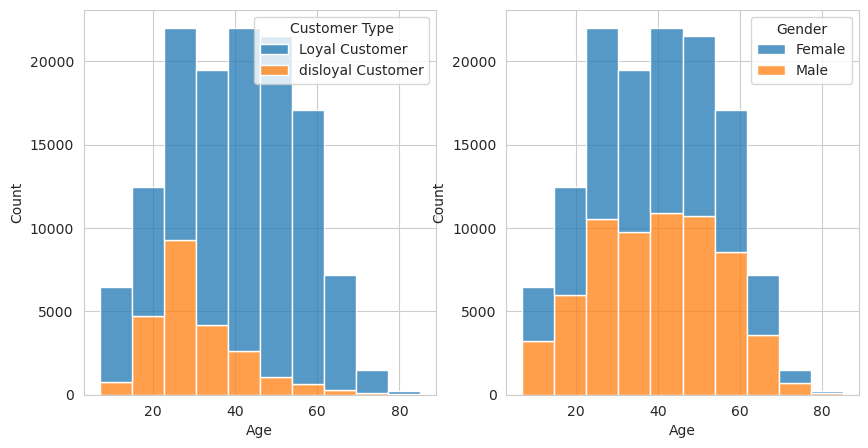

In [99]:
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df_air, x='Age', bins=10, hue='Customer Type', multiple='stack', ax=ax1)
sns.histplot(data=df_air, x='Age', bins=10, hue='Gender', multiple='stack', ax=ax2)


In [117]:
def clasificar_etapa_vida(edad):
    if edad < 13:
        return 'Infancia'
    elif edad < 18:
        return 'Adolescencia'
    elif edad < 25:
        return 'Jóvenes adultos'
    elif edad < 35:
        return 'Adultos jóvenes'
    elif edad < 45:
        return 'Adultos medios'
    elif edad < 55:
        return 'Adultos mayores'
    elif edad < 65:
        return 'Prejubilación'
    else:
        return 'Jubilación y tercera edad'


df_air['Age Stage'] = df_air['Age'].apply(clasificar_etapa_vida)
etapas_orden = ['Infancia', 'Adolescencia', 'Jóvenes adultos', 'Adultos jóvenes',
                'Adultos medios', 'Adultos mayores', 'Prejubilación',
                'Jubilación y tercera edad']
df_air['Age Stage'] = pd.Categorical(df_air['Age Stage'], categories=etapas_orden, ordered=True)

<Axes: xlabel='Age Stage', ylabel='Count'>

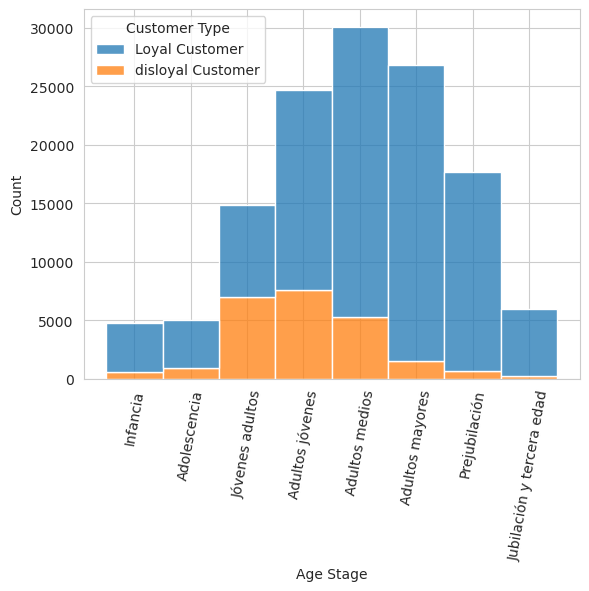

In [123]:
plt.xticks(rotation=80)
sns.histplot(data=df_air, x='Age Stage', hue='Customer Type', multiple='stack')





In [136]:
df_air[df_air['Inflight entertainment'] == 0]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Stage
67666,Male,Loyal Customer,26,Business travel,Eco,999,0,2,3,2,0,1,3,0,4,4,4,2,3,0,0,0.0,neutral or dissatisfied,Adultos jóvenes
25512,Male,Loyal Customer,23,Business travel,Eco Plus,1407,0,5,5,5,0,1,4,0,2,1,4,1,3,0,28,26.0,neutral or dissatisfied,Jóvenes adultos
21706,Male,Loyal Customer,24,Business travel,Eco Plus,612,0,1,4,4,0,1,4,0,3,5,4,1,3,0,0,0.0,neutral or dissatisfied,Jóvenes adultos
16475,Male,Loyal Customer,43,Business travel,Business,3098,2,3,3,3,1,2,2,0,0,1,2,2,0,1,3,0.0,neutral or dissatisfied,Adultos medios
88714,Female,Loyal Customer,53,Business travel,Business,184,2,3,3,3,2,3,3,0,0,1,2,3,0,4,0,0.0,neutral or dissatisfied,Adultos mayores
84321,Male,Loyal Customer,21,Business travel,Eco,689,0,1,1,1,0,1,2,0,2,5,3,2,3,0,0,0.0,neutral or dissatisfied,Jóvenes adultos
53059,Female,Loyal Customer,24,Business travel,Business,3156,3,3,5,3,0,1,3,0,2,4,3,4,4,0,40,30.0,neutral or dissatisfied,Jóvenes adultos
4667,Female,Loyal Customer,66,Business travel,Business,3969,3,4,4,4,1,3,3,0,0,1,3,3,0,2,0,0.0,neutral or dissatisfied,Jubilación y tercera edad
60740,Male,Loyal Customer,23,Business travel,Eco Plus,1984,0,1,1,1,0,1,2,0,1,4,4,4,3,0,0,0.0,neutral or dissatisfied,Jóvenes adultos
466,Female,Loyal Customer,49,Business travel,Business,1600,2,5,5,5,4,4,4,0,0,1,2,2,0,3,0,0.0,neutral or dissatisfied,Adultos mayores
